In [57]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [58]:
df=pd.read_csv("file:///F:/Toyota.csv")
df.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [59]:
df.shape

(1436, 11)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [61]:
df.describe()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,717.500000,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,414.681806,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,358.750000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,717.500000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,1076.250000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,1435.000000,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [62]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [63]:
df.isnull().sum()

Unnamed: 0      0
Price           0
Age           100
KM              0
FuelType      100
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [64]:
df=df.fillna(0)

In [65]:
df.isnull().sum().sum()

0

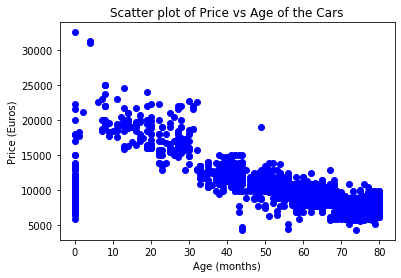

In [66]:
plt.scatter(df['Age'],df['Price'],c='blue')

# To set the title
plt.title('Scatter plot of Price vs Age of the Cars')

# To set the x and y axis labels.
plt.xlabel('Age (months)')
plt.ylabel('Price (Euros)')
plt.show()

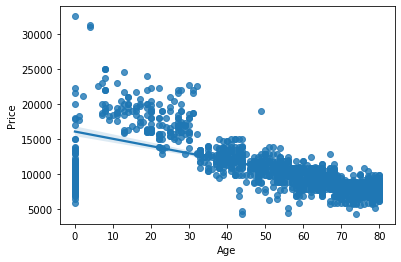

In [67]:
sns.regplot(x=df['Age'], y=df['Price'])

Text(0, 0.5, 'Frequency')

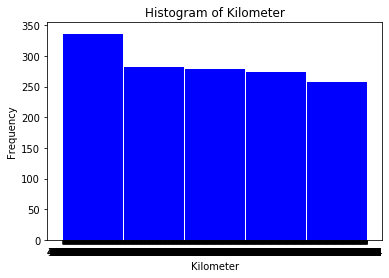

In [68]:
plt.hist(df['KM'], color = 'blue', edgecolor = 'white', bins = 5)

# To set the title
plt.title('Histogram of Kilometer')

# To set the x and y axis labels.
plt.xlabel('Kilometer')
plt.ylabel('Frequency')

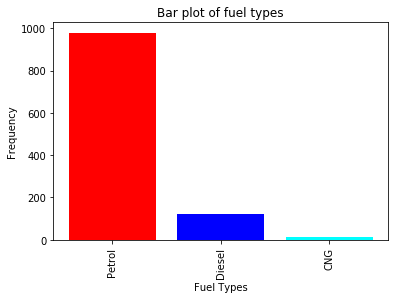

In [69]:
counts = [979,120,12]
fuelType = ("Petrol","Diesel","CNG")
index = np.arange(len(fuelType))

plt.bar(index, counts, color=['red', 'blue', 'cyan'])
plt.title("Bar plot of fuel types")
plt.xlabel("Fuel Types")
plt.ylabel("Frequency")
plt.xticks(index,fuelType,rotation = 90)
plt.show()

In [70]:
df.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,0.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [71]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
df=df.drop(['Unnamed: 0'],axis=1)

In [74]:
le=LabelEncoder()
df['Doors']=le.fit_transform(df['Doors'])

In [75]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,6,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,1,1165
2,13950,24.0,41711,Diesel,90,0.0,0,2000,1,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,1,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,1,1170


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text xticklabel objects>)

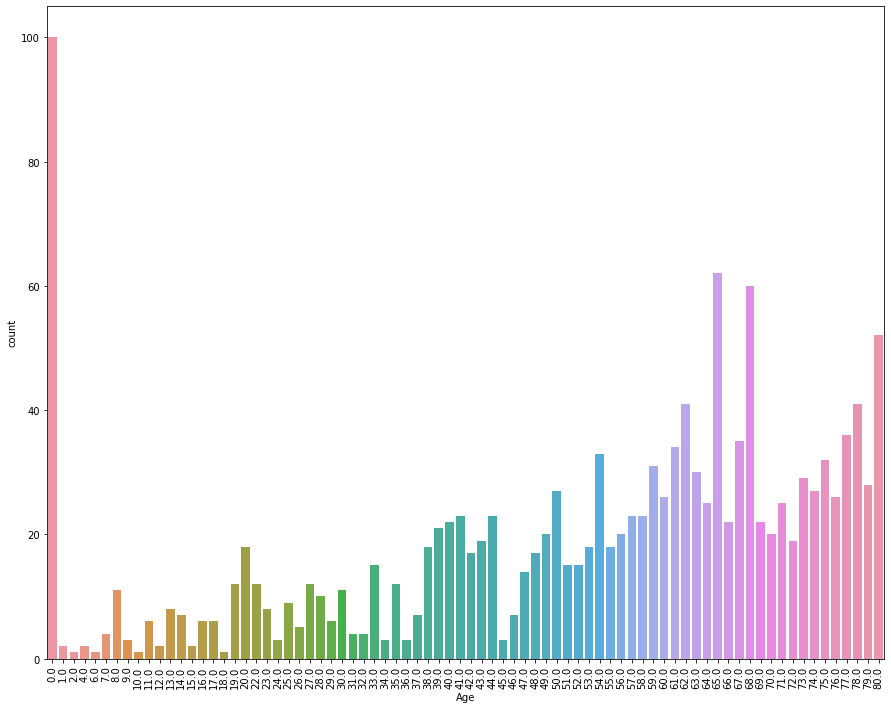

In [76]:
plt.figure(figsize=(15,12))
sns.countplot(df['Age'])
plt.xticks(rotation = 90)

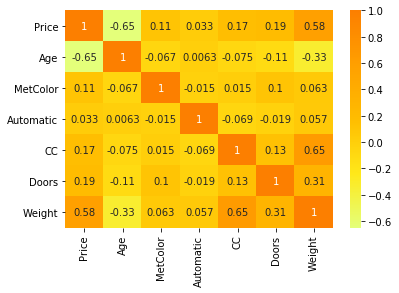

In [77]:
sns.heatmap(df.corr(),annot=True,cmap='Wistia')

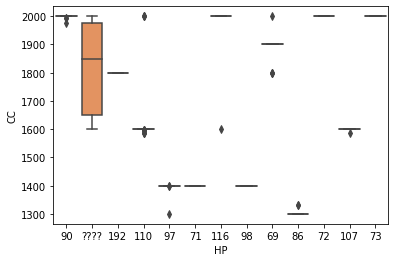

In [78]:
sns.boxplot(x='HP',y='CC',data=df)

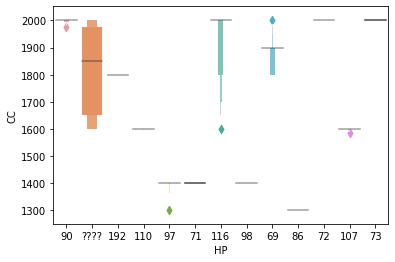

In [79]:
sns.boxenplot(x='HP',y='CC',data=df)

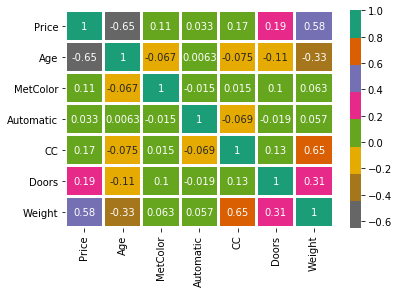

In [80]:
sns.heatmap(df.corr(),cmap='Dark2_r',linewidths=2,annot=True)

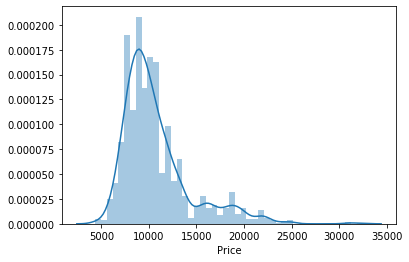

In [81]:
sns.distplot(df['Price'])

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

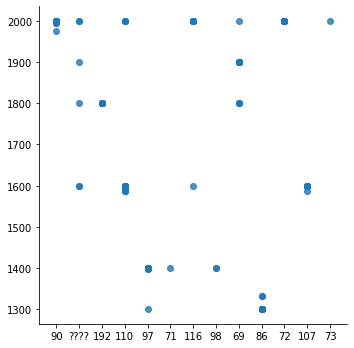

In [82]:
sns.lmplot(x='HP',y='CC',data=df)

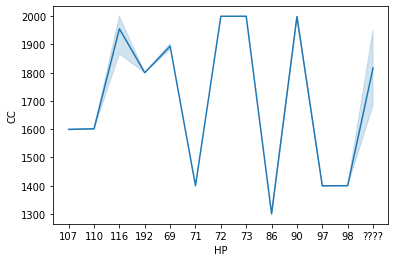

In [84]:
sns.lineplot(x='HP',y='CC',data=df)

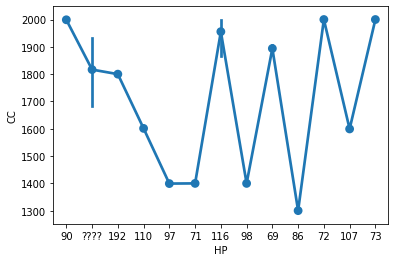

In [85]:
sns.pointplot(x='HP',y='CC',data=df)

In [86]:
x=df.HP.values
y=df.CC.values

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [88]:
x=x.reshape(-1,1)

In [89]:
y=y.reshape(-1,1)

In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [95]:
df.dtypes

Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors          int32
Weight         int64
dtype: object

In [93]:
df.H

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.